<a href="https://colab.research.google.com/github/bhlr/Ciencia-de-Datos-en-Python-Seccion-U.../blob/main/proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyándose de referencias adicionales útiles) para crear modelos predictivos de regresión lineal uni-variable sencillos de la forma:

y = f(x) =  mx +b

Donde:

y = la variable dependiente
x = variable independiente
m = pendiente de la recta(parámetro del modelo)
b = intercepto(parámetro del modelo)

Tanto “x” como “y” son parte del dataset usado , “m” y “b” son parámetros del modelo los cuales buscamos estimar con los datos, esto significa que se busca encontrar que valores de “m” y “b” producen una recta que describa de la mejor manera posible la relación entre los datos “x” y “y”.


In [4]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

# Datos

Usando slicing como fue visto en clase el dataset usado será dividido de la siguiente forma:
 

*   80% del dataset(rows) se usará para todo el proceso(análisis exploratorio,selección de variables a usar, crear modelos predictivos). Les llamamos “datos de entrenamiento”
*   20% del dataset(rows) se usará para probar ,validar y evaluar los modelos resultantes.Esto significa que el 20% de data no es usado durante todo el proyecto y es usado solo al final del mismo cuando ya poseemos los modelos predictivos. Les llamamos “datos de validación y pruebas”


  


In [11]:
# for drive
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#2. Get the file
downloaded = drive.CreateFile({'id':"18KJ-ZgNYR_EJEQUh0yMOJFHg7UGX1Z1E"})   # replace the id with id of file you want to access
downloaded.GetContentFile('proyecto_training_data.npy')
downloaded

GoogleDriveFile({'id': '18KJ-ZgNYR_EJEQUh0yMOJFHg7UGX1Z1E', 'kind': 'drive#file', 'etag': '"MTYxNzY2NTUzMjU3Mg"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/18KJ-ZgNYR_EJEQUh0yMOJFHg7UGX1Z1E', 'webContentLink': 'https://drive.google.com/uc?id=18KJ-ZgNYR_EJEQUh0yMOJFHg7UGX1Z1E&export=download', 'alternateLink': 'https://drive.google.com/file/d/18KJ-ZgNYR_EJEQUh0yMOJFHg7UGX1Z1E/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/18KJ-ZgNYR_EJEQUh0yMOJFHg7UGX1Z1E/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/octet-stream', 'title': 'proyecto_training_data.npy', 'mimeType': 'application/octet-stream', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2021-04-05T20:47:04.548Z', 'modifiedDate': '2021-04-05T23:32:12.572Z', 'modifiedByMeDate': '2021-04-05T23:32:12.572Z', 'lastViewedByMeDate': '2021-04-05T23

In [13]:
data=np.load("proyecto_training_data.npy")
##import tensorflow as tf
#DATA_URL = 'https://drive.google.com/file/d/18KJ-ZgNYR_EJEQUh0yMOJFHg7UGX1Z1E/view?usp=sharing'

#path = tf.keras.utils.get_file('proyecto_training_data.npy', DATA_URL)
#c=np.load(path)
print(data.shape)

(1460, 6)


In [174]:
int(len(data[:,0])) * 0.8

1168.0

In [176]:
cantidad = int(len(data[:,0]) * 0.8)
train, test = data[:cantidad, :], data[cantidad:, :] 
print(train.shape,test.shape)

(1168, 6) (292, 6)


In [177]:
dstrain = pd.DataFrame(train, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
dstrain.head()


,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [178]:
dstest = pd.DataFrame(test, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
dstest.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,235000.0,6.0,1236.0,7.0,1935.0,120.0
1,625000.0,10.0,1831.0,10.0,1995.0,118.0
2,171000.0,6.0,1118.0,6.0,1977.0,76.0
3,163000.0,6.0,1261.0,6.0,1958.0,76.0
4,171900.0,7.0,625.0,5.0,2006.0,35.0


In [179]:
dsstats = dstrain.describe()
dsstats

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


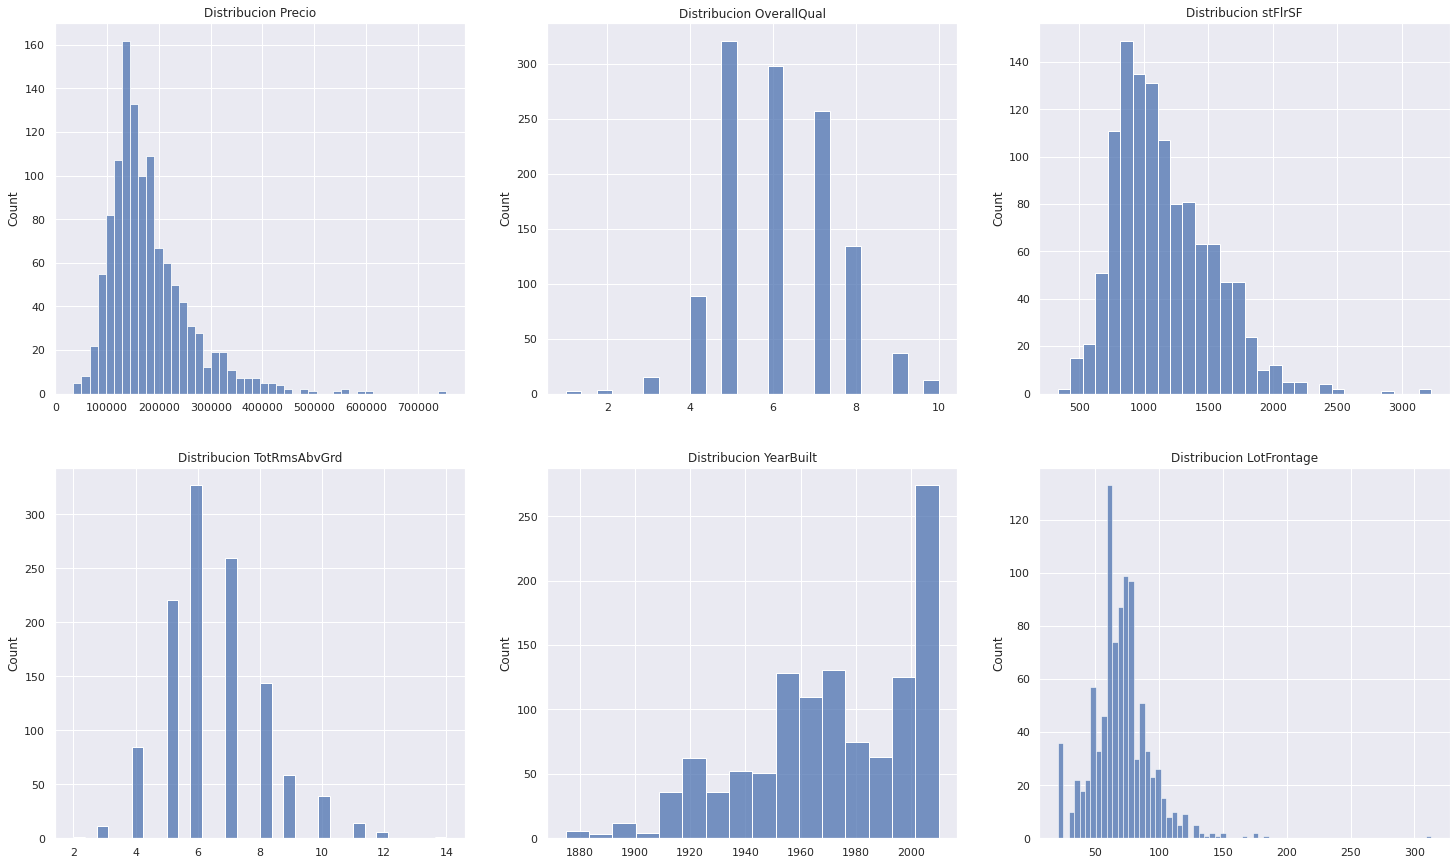

In [180]:
 SalePrice = train[:, 0]
 OverallQual = train[:, 1]
 stFlrSF = train[:, 2]
 TotRmsAbvGrd = train[:, 3]
 YearBuilt	= train[:, 4]
 LotFrontage = train[:, 5]

fig  = plt.figure()
#ax = fig.add_subplots(2,3) #221
ax1 = fig.add_subplot(2,3,1) #221
ax2 = fig.add_subplot(2,3,2) #222
ax3 = fig.add_subplot(2,3,3)  # 223
ax4 = fig.add_subplot(2,3,4) #221
ax5 = fig.add_subplot(2,3,5) #222
ax6 = fig.add_subplot(2,3,6)  # 223
ax1.set_title('Distribucion Precio')
ax2.set_title('Distribucion OverallQual')
ax3.set_title('Distribucion stFlrSF')
ax2.set_title('Distribucion OverallQual')
ax3.set_title('Distribucion stFlrSF')
ax4.set_title('Distribucion TotRmsAbvGrd')
ax5.set_title('Distribucion YearBuilt')
ax6.set_title('Distribucion LotFrontage')

sns.histplot(SalePrice,ax = ax1)
sns.histplot(OverallQual,ax = ax2)
sns.histplot(stFlrSF,ax = ax3)
sns.histplot(TotRmsAbvGrd,ax = ax4)
sns.histplot(YearBuilt,ax = ax5)
sns.histplot(LotFrontage,ax = ax6)

plt.show()

In [181]:

corrrelacion = dstrain.corr()['SalePrice'].iloc[1:]
corrrelacion

OverallQual     0.793990
1stFlrSF        0.616289
TotRmsAbvGrd    0.564707
YearBuilt       0.534171
LotFrontage     0.363292
Name: SalePrice, dtype: float64

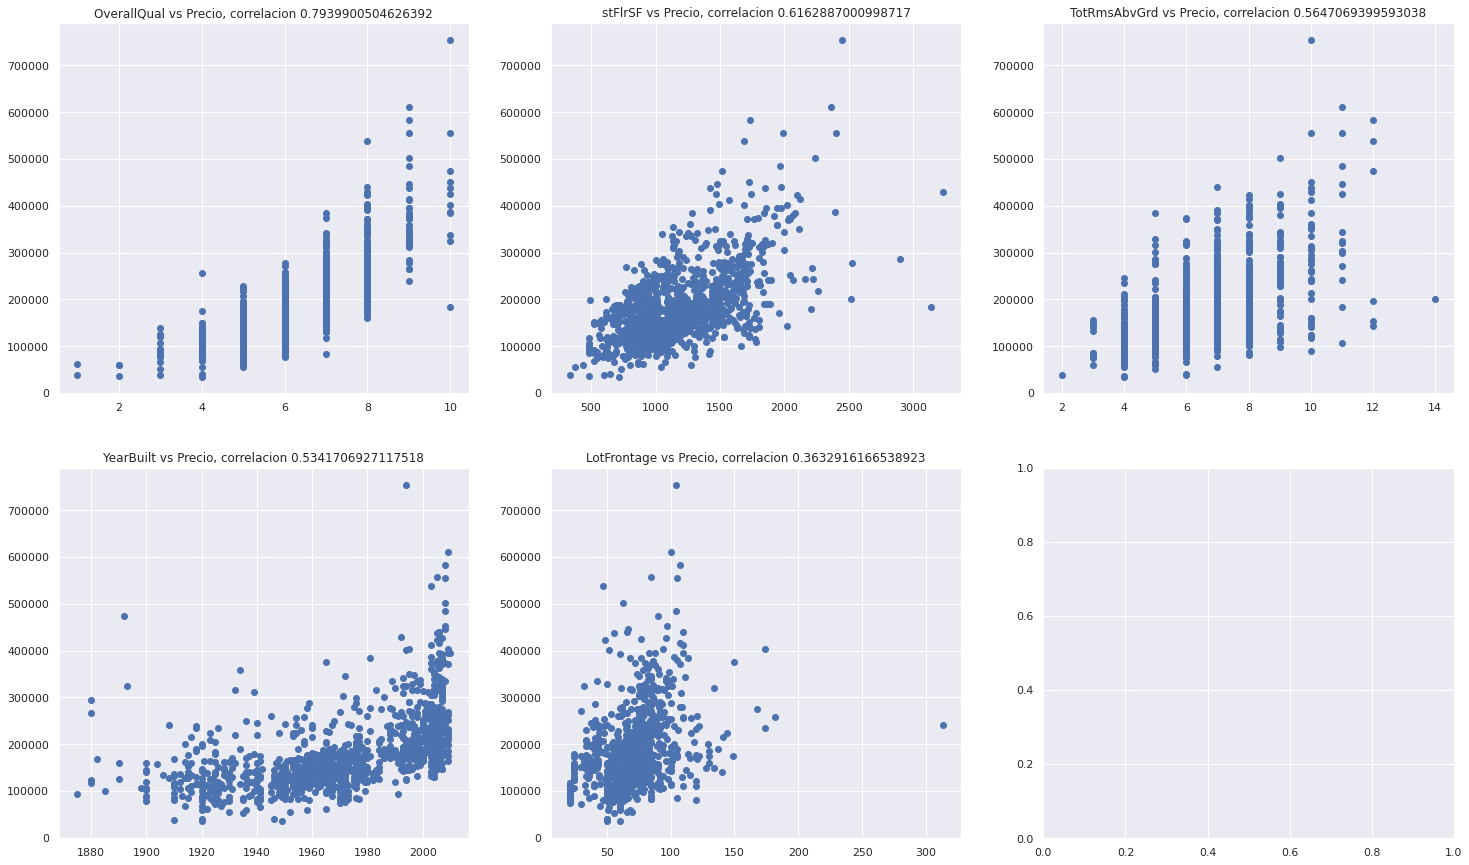

In [182]:


fig  = plt.figure()
#ax = fig.add_subplots(2,3) #221
ax1 = fig.add_subplot(2,3,1) #221
ax2 = fig.add_subplot(2,3,2) #222
ax3 = fig.add_subplot(2,3,3)  # 223
ax4 = fig.add_subplot(2,3,4) #221
ax5 = fig.add_subplot(2,3,5) #222
ax6 = fig.add_subplot(2,3,6)  # 223
ax1.set_title('OverallQual vs Precio, correlacion {}'.format(corrrelacion['OverallQual']))
ax2.set_title('stFlrSF vs Precio, correlacion {}'.format(corrrelacion['1stFlrSF']))
ax3.set_title('TotRmsAbvGrd vs Precio, correlacion {}'.format(corrrelacion['TotRmsAbvGrd']))
ax4.set_title('YearBuilt vs Precio, correlacion {}'.format(corrrelacion['YearBuilt']))
ax5.set_title('LotFrontage vs Precio, correlacion {}'.format(corrrelacion['LotFrontage']))

ax1.scatter(x = train[:, 1], y = train[:, 0])
ax2.scatter(x = train[:, 2], y = train[:, 0])
ax3.scatter(x = train[:, 3], y = train[:, 0])
ax4.scatter(x = train[:, 4], y = train[:, 0])
ax5.scatter(x = train[:, 5], y = train[:, 0])



plt.show()

Crear una función para entrenar un modelo de regresión lineal de una variable 
y = mx +b.

In [183]:
def calcularError(y, yhat):
    return (1/2) * np.mean(np.power((y - yhat), 2))
calcularError(np.array([1,2,3,4]),np.array([2,3,4,5]))

def gradiente (y,yhat,x):
    return np.mean(np.hstack((yhat - y, yhat - y)) * x, axis = 0)[:, np.newaxis]
y =np.array([[1],[2],[3],[4]])
y =np.array([[1],[2],[3],[4]])
yhat =np.array([[1.2],[2.3],[3.5],[4.8]])
gradiente (y,yhat,x)

array([[1.375],
       [1.375]])

In [188]:

def Model(x, y, epochs = 100, imprimir_error_cada = 10, lr = 0.001):
    parametros = np.zeros((2, 1))
    observacion = np.hstack((x, np.ones_like(x)))
    errores = []
    resultParams = dict()
    i = 1
    while i <= epochs :
        yhat = np.matmul(observacion, parametros)
        error = calcularError(y, yhat)
        errores.append(error)
        gradients = gradiente(y,yhat,observacion)
        parametros -=(lr * gradients)
        resultParams[i] = {'params' : parametros,'yhat' : yhat}     
        if i % imprimir_error_cada == 0:
            print("Interaccion {}, : {}".format(i, error))
        i += 1
        
    return resultParams, errores
x = np.array([[1],[2],[3],[4]])
modelo, Nerrores = Model(np.array([[1],[2],[3],[4]]),np.array([[2],[3],[4],[5]]))
print(modelo)

Interaccion 10, : 5.808354182080246
Interaccion 20, : 4.915963071361842
Interaccion 30, : 4.161342779528889
Interaccion 40, : 3.5232217138999244
Interaccion 50, : 2.9836125874344646
Interaccion 60, : 2.5273053262888903
Interaccion 70, : 2.1414382717746077
Interaccion 80, : 1.8151355881663962
Interaccion 90, : 1.5392006542652856
Interaccion 100, : 1.3058567948983464
{1: {'params': array([[0.67886209],
       [0.24070111]]), 'yhat': array([[0.],
       [0.],
       [0.],
       [0.]])}, 2: {'params': array([[0.67886209],
       [0.24070111]]), 'yhat': array([[0.0135],
       [0.0235],
       [0.0335],
       [0.0435]])}, 3: {'params': array([[0.67886209],
       [0.24070111]]), 'yhat': array([[0.02688775],
       [0.046804  ],
       [0.06672025],
       [0.0866365 ]])}, 4: {'params': array([[0.67886209],
       [0.24070111]]), 'yhat': array([[0.04016419],
       [0.06991364],
       [0.09966309],
       [0.12941254]])}, 5: {'params': array([[0.67886209],
       [0.24070111]]), 'yhat': a

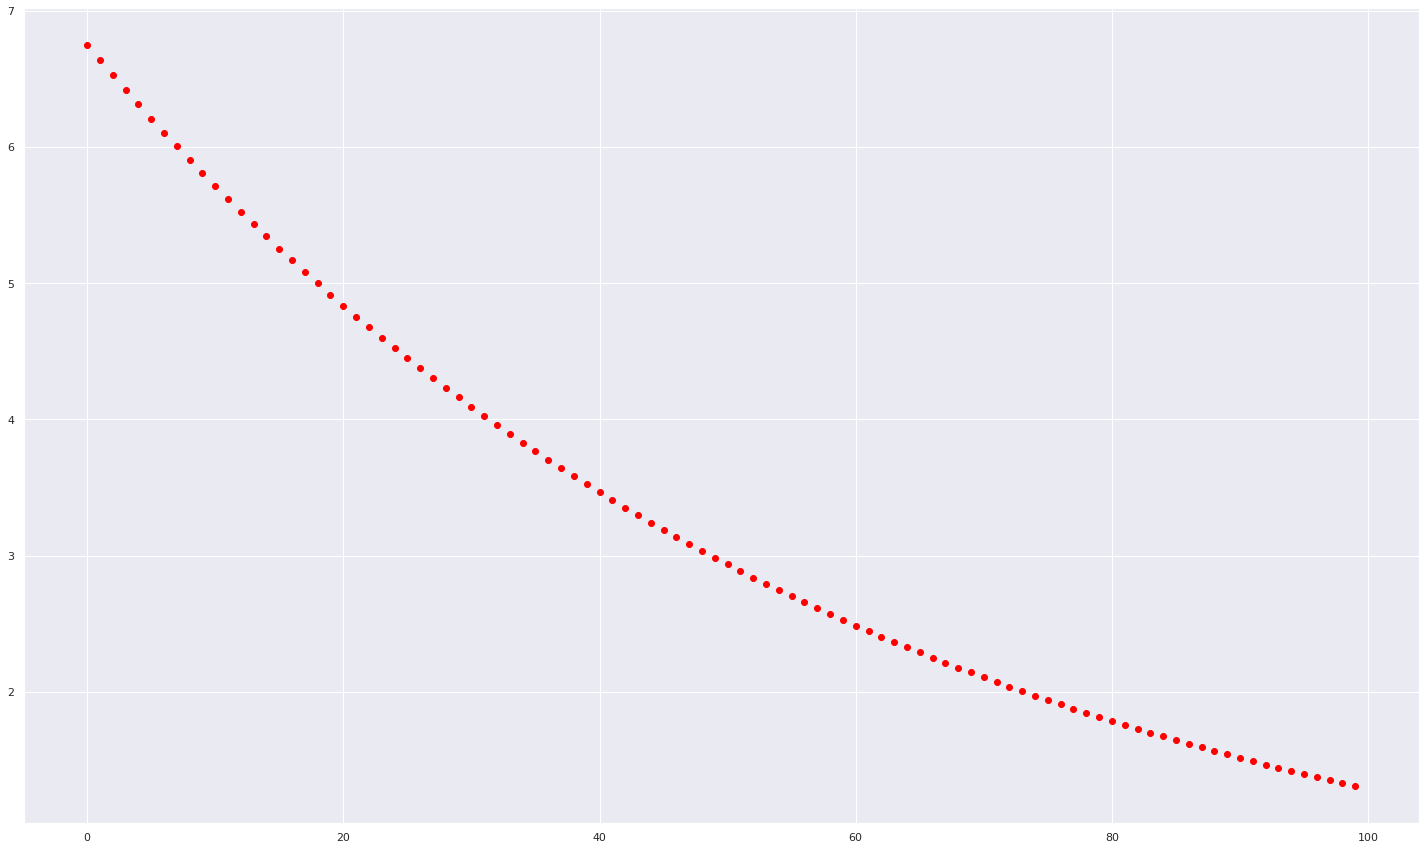

In [165]:
def errorGraf (errores):
    plt.scatter(x = range(0,len(errores)), y = errores,color="red") 
    plt.show()
    return
errorGraf(Nerrores)

Crear una función que nos permita visualizar con matplotlib cómo evoluciona el modelo entrenado en el tiempo 


[[0.78434897]
 [1.36384152]
 [1.94333407]
 [2.52282662]]


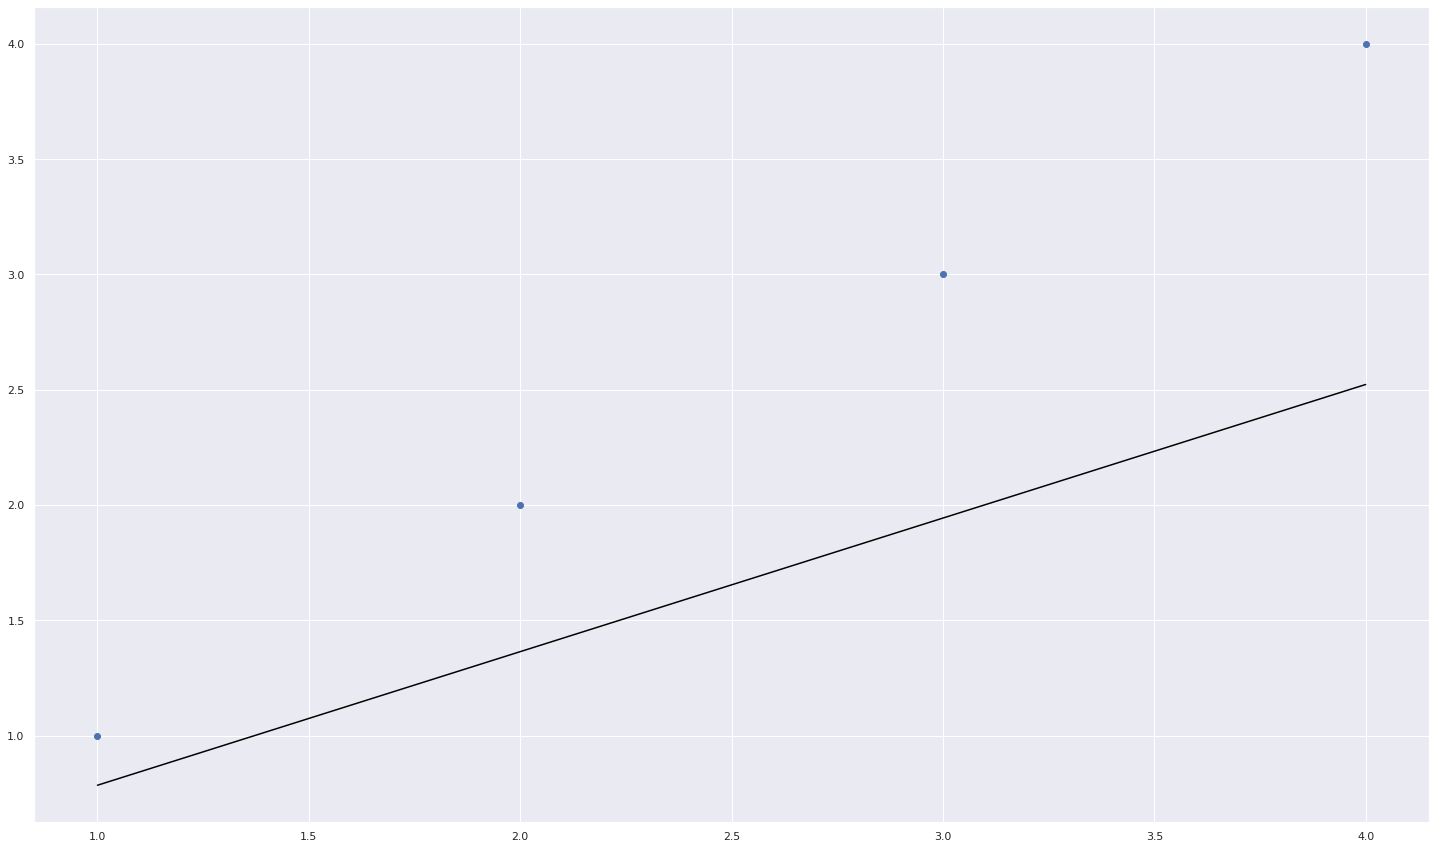

In [194]:
def grafModel(datos,x,n=80):
    yhat = datos[n]['yhat']
    print(yhat)
    plt.plot(x, yhat, color = 'black')
    plt.scatter(x, y)
    plt.show()
grafModel(modelo,x)